In [1]:
import numpy as np
import pandas as pd
import dateutil
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# churn.csv
churn_df = pd.read_csv("./data/churn.csv")
churn_df["lastParticipationDate"] = pd.to_datetime(churn_df["lastParticipationDate"]).dt.normalize()

# comments_clean_anonymized.csv
cca_df = pd.read_csv("./data/comments_clean_anonymized.csv")
cca_df['commentDate'] = pd.to_datetime(cca_df['commentDate']).dt.normalize()
cca_df.head()

# votes
votes_df = pd.read_csv("./data/votes.csv")
votes_df["voteDate"] = pd.to_datetime(votes_df["voteDate"]).dt.normalize()
votes_df.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/python_dateutil-2.8.1-py3.8.egg/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/python_dateutil-2.8.1-py3.8.egg/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,2016-02-01,4
1,33,56aec740f1ef260003e307d6,2016-02-01,4
2,79,56aec740f1ef260003e307d6,2016-02-01,4
3,94,56aec740f1ef260003e307d6,2016-02-01,4
4,16,56aec740f1ef260003e307d6,2016-02-01,2


In [3]:
firstVoteDate = votes_df.groupby(["employee", "companyAlias"]).agg({"voteDate": "min"}).reset_index()
firstVoteDate.rename(columns={"voteDate": "firstVoteDate"}, inplace=True)
firstVoteDate

,employee,companyAlias,firstVoteDate
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25
1,1,54d43612e4b0f6a40755d93e,2015-02-06
2,1,54e52607e4b01191dc064966,2015-03-25
3,1,5641f96713664c000332c8cd,2016-04-28
4,1,56558cfd07a5de00030908fb,2015-11-25
...,...,...,...
4372,991,54e52607e4b01191dc064966,2016-09-21
4373,995,54e52607e4b01191dc064966,2016-09-01
4374,996,54e52607e4b01191dc064966,2016-09-05
4375,997,54e52607e4b01191dc064966,2016-11-14


In [4]:
firstCommentDate = cca_df.groupby(["employee", 
                                   "companyAlias"]).agg({"commentDate": "min"}).reset_index()
firstCommentDate.rename(columns={"commentDate": "firstCommentDate"}, inplace=True)
firstCommentDate

,employee,companyAlias,firstCommentDate
0,-217,54e52607e4b01191dc064966,2015-02-26
1,-216,54e52607e4b01191dc064966,2015-02-25
2,-214,54e52607e4b01191dc064966,2015-03-06
3,-213,54e52607e4b01191dc064966,2015-03-09
4,-212,54e52607e4b01191dc064966,2015-03-10
...,...,...,...
3214,968,54e52607e4b01191dc064966,2016-09-13
3215,969,54e52607e4b01191dc064966,2016-10-10
3216,970,54e52607e4b01191dc064966,2016-09-13
3217,996,54e52607e4b01191dc064966,2016-09-05


In [5]:
# firstActiveDate = earlier of (firstVoteDate, firstCommentDate)
firstDates = pd.merge(firstVoteDate, firstCommentDate, on=["employee", "companyAlias"], how="outer")
firstDates["firstActiveDate"] = firstDates[['firstVoteDate','firstCommentDate']].min(axis=1)
firstDates

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25
1,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06
2,1,54e52607e4b01191dc064966,2015-03-25,NaT,2015-03-25
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28
4,1,56558cfd07a5de00030908fb,2015-11-25,2015-11-25,2015-11-25
...,...,...,...,...,...
4710,-2,57c4aa7dbb8b5c000396fd3b,NaT,2016-09-21,2016-09-21
4711,-2,57d1eb86a22c9d0003dd1f05,NaT,2016-09-12,2016-09-12
4712,-2,57dd2d6a4018d9000339ca43,NaT,2016-09-22,2016-09-22
4713,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01


In [6]:
# Setting one time period = 30 days
timePeriod = 30

In [7]:
# Merge first dates with the votes dataframe
votes_merge = pd.merge(firstDates, votes_df, on=["employee", "companyAlias"], how="inner")
votes_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,voteDate,vote
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2014-11-25,4
1,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2014-11-26,4
2,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-06,3
3,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-12,3
4,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-19,4
...,...,...,...,...,...,...,...
221227,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-01-21,3
221228,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-01-30,3
221229,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-02-03,3
221230,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-02-10,2


In [8]:
# Calculate the time period of each vote
votes_merge["period"] = np.ceil(((votes_merge["voteDate"] - 
                                  votes_merge["firstActiveDate"]).dt.days + 1) / timePeriod)
votes_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,voteDate,vote,period
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2014-11-25,4,1.0
1,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2014-11-26,4,1.0
2,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-06,3,1.0
3,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-12,3,1.0
4,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-19,4,1.0
...,...,...,...,...,...,...,...,...
221227,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-01-21,3,5.0
221228,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-01-30,3,5.0
221229,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-02-03,3,5.0
221230,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-02-10,2,5.0


In [9]:
# Merge first dates with the cca dataframe
cca_merge = pd.merge(firstDates, cca_df, on=["employee", "companyAlias"], how="inner")
cca_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,commentId,txt,likes,dislikes,commentDate
0,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,589d817d03f2e60004fff0f8,******************,6.0,1.0,2017-02-10
1,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587c9cc45a5d5d00047d3516,***********,3.0,3.0,2017-01-16
2,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587ae5e11ddb6800040be36c,*,0.0,3.0,2017-01-15
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587a5f0fc535230004ca0445,*,0.0,3.0,2017-01-14
4,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,5878d346e201b100044843dd,*,0.0,5.0,2017-01-13
...,...,...,...,...,...,...,...,...,...,...
82751,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,5847c05ef77d9e0004700393,**********************************************...,0.0,1.0,2016-12-07
82752,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,58413c460176d500049f939b,*********************************************,2.0,0.0,2016-12-02
82753,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,583fd0f779244000040dd4d6,*******************************,2.0,0.0,2016-12-01
82754,-2,58a728a0e75bda00042a3468,NaT,2017-03-03,2017-03-03,58b92e4746b59c00044ee4e3,**********************************************...,18.0,20.0,2017-03-03


In [10]:
# Calculate the time period of each vote
cca_merge["period"] = np.ceil(((cca_merge["commentDate"] - 
                                cca_merge["firstActiveDate"]).dt.days + 1) / timePeriod)
cca_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,commentId,txt,likes,dislikes,commentDate,period
0,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,589d817d03f2e60004fff0f8,******************,6.0,1.0,2017-02-10,10.0
1,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587c9cc45a5d5d00047d3516,***********,3.0,3.0,2017-01-16,9.0
2,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587ae5e11ddb6800040be36c,*,0.0,3.0,2017-01-15,9.0
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587a5f0fc535230004ca0445,*,0.0,3.0,2017-01-14,9.0
4,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,5878d346e201b100044843dd,*,0.0,5.0,2017-01-13,9.0
...,...,...,...,...,...,...,...,...,...,...,...
82751,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,5847c05ef77d9e0004700393,**********************************************...,0.0,1.0,2016-12-07,1.0
82752,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,58413c460176d500049f939b,*********************************************,2.0,0.0,2016-12-02,1.0
82753,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,583fd0f779244000040dd4d6,*******************************,2.0,0.0,2016-12-01,1.0
82754,-2,58a728a0e75bda00042a3468,NaT,2017-03-03,2017-03-03,58b92e4746b59c00044ee4e3,**********************************************...,18.0,20.0,2017-03-03,1.0


In [11]:
votes_snapshot = votes_merge.groupby(["employee", 
                                      "companyAlias",
                                      "firstActiveDate",
                                      "period"]).agg({"vote": ["mean", "count"]}).reset_index()

votes_snapshot.columns = ['_'.join(col).strip() if len(col[1]) > 0 else col[0] for col in votes_snapshot.columns.values]
votes_snapshot

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,1.0,4.00,2
1,1,54d43612e4b0f6a40755d93e,2015-02-06,1.0,3.20,5
2,1,54d43612e4b0f6a40755d93e,2015-02-06,15.0,2.50,2
3,1,54d43612e4b0f6a40755d93e,2015-02-06,16.0,3.25,8
4,1,54d43612e4b0f6a40755d93e,2015-02-06,17.0,3.00,1
...,...,...,...,...,...,...
20458,999,54e52607e4b01191dc064966,2016-09-15,2.0,3.00,4
20459,999,54e52607e4b01191dc064966,2016-09-15,3.0,3.00,1
20460,999,54e52607e4b01191dc064966,2016-09-15,4.0,3.00,1
20461,999,54e52607e4b01191dc064966,2016-09-15,5.0,2.80,5


In [12]:
cca_merge['commentLen'] = cca_merge['txt'].str.len()
cca_snapshot = cca_merge.groupby(["employee", 
                                  "companyAlias",
                                  "firstActiveDate",
                                  "period"]).agg({"commentId": "count",
                                                  "likes": ["sum", "mean"],
                                                  "dislikes": ["sum", "mean"], 
                                                  "commentLen": "mean"
                                                 }).reset_index()
cca_snapshot.columns = ['_'.join(col).strip() if len(col[1]) > 0 
                        else col[0] for col in cca_snapshot.columns.values]
cca_snapshot

,employee,companyAlias,firstActiveDate,period,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean
0,-217,54e52607e4b01191dc064966,2015-02-26,1.0,2,16.0,8.0,0.0,0.00,258.00
1,-216,54e52607e4b01191dc064966,2015-02-25,1.0,6,24.0,4.0,0.0,0.00,25.00
2,-214,54e52607e4b01191dc064966,2015-03-06,1.0,2,0.0,0.0,0.0,0.00,4.00
3,-213,54e52607e4b01191dc064966,2015-03-09,1.0,2,2.0,1.0,0.0,0.00,51.00
4,-212,54e52607e4b01191dc064966,2015-03-10,1.0,2,0.0,0.0,0.0,0.00,6.00
...,...,...,...,...,...,...,...,...,...,...
10593,970,54e52607e4b01191dc064966,2016-09-05,5.0,10,258.0,25.8,10.0,1.00,157.20
10594,970,54e52607e4b01191dc064966,2016-09-05,6.0,2,8.0,4.0,14.0,7.00,10.00
10595,996,54e52607e4b01191dc064966,2016-09-05,1.0,8,64.0,8.0,10.0,1.25,76.75
10596,996,54e52607e4b01191dc064966,2016-09-05,4.0,4,20.0,5.0,2.0,0.50,97.50


In [13]:
# Merge cca and votes snapshots
snapshot = pd.merge(votes_snapshot, cca_snapshot, 
                    on=["employee", "companyAlias", 
                        "firstActiveDate", "period"], 
                    how="outer")

# snapshot.fillna(0, inplace=True)
snapshot

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,1.0,4.00,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,54d43612e4b0f6a40755d93e,2015-02-06,1.0,3.20,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,54d43612e4b0f6a40755d93e,2015-02-06,15.0,2.50,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,54d43612e4b0f6a40755d93e,2015-02-06,16.0,3.25,8.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,54d43612e4b0f6a40755d93e,2015-02-06,17.0,3.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21225,118,54e52607e4b01191dc064966,2016-11-17,2.0,NaN,NaN,4.0,21.0,5.25,2.0,0.500000,53.75
21226,118,54e52607e4b01191dc064966,2016-11-17,3.0,NaN,NaN,1.0,12.0,12.00,0.0,0.000000,39.00
21227,118,54e52607e4b01191dc064966,2016-11-17,4.0,NaN,NaN,2.0,13.0,6.50,4.0,2.000000,48.50
21228,160,54e52607e4b01191dc064966,2016-12-22,3.0,NaN,NaN,3.0,12.0,4.00,23.0,7.666667,279.00


In [14]:
snapshot.describe()

,employee,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean
count,21230.000000,21230.000000,20463.000000,20463.000000,10598.000000,10598.000000,10598.000000,10598.000000,10598.000000,10591.000000
mean,164.120301,5.162694,2.900308,10.811318,7.808549,53.668994,7.275118,9.921023,1.283855,100.093500
std,181.490350,4.655730,0.784696,8.926602,8.304792,79.047497,6.916156,21.802962,2.171121,112.201548
min,-217.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,42.000000,2.000000,2.500000,3.000000,2.000000,10.000000,2.222222,0.000000,0.000000,36.000000
50%,117.000000,4.000000,3.000000,8.000000,4.000000,26.000000,5.250000,2.000000,0.500000,66.666667
75%,219.000000,7.000000,3.400000,17.000000,10.000000,64.000000,10.000000,10.000000,1.666667,122.266667
max,999.000000,26.000000,4.000000,54.000000,68.000000,1002.000000,64.000000,474.000000,33.000000,1989.733333


In [15]:
# Remove invalid and duplicated entries in churn_df
churn_cleaned = churn_df[~churn_df.duplicated(["employee", 
                                               "companyAlias"], keep=False)]
churn_cleaned

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,2017-02-23,True
1,-2,56aec740f1ef260003e307d6,0,2017-01-18,False
2,2,56aec740f1ef260003e307d6,72,2017-03-17,True
4,3,56aec740f1ef260003e307d6,22,2017-02-16,True
5,-4,56aec740f1ef260003e307d6,0,2016-11-07,False
...,...,...,...,...,...
4842,857,58a728a0e75bda00042a3468,1,2017-03-17,True
4843,858,58a728a0e75bda00042a3468,1,2017-03-17,True
4844,859,58a728a0e75bda00042a3468,1,2017-03-17,True
4845,17,573a0671b5ec330003add34a,7,2016-06-28,True


In [16]:
# Merge first dates with the churn dataframe
churn_merge = pd.merge(firstDates, churn_cleaned, on=["employee", "companyAlias"], how="inner")
churn_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,numVotes,lastParticipationDate,stillExists
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2,2014-11-26,True
1,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,16,2016-06-08,False
2,1,54e52607e4b01191dc064966,2015-03-25,NaT,2015-03-25,135,2016-09-29,False
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,257,2017-03-19,True
4,1,56558cfd07a5de00030908fb,2015-11-25,2015-11-25,2015-11-25,2,2015-11-29,True
...,...,...,...,...,...,...,...,...
4632,-2,574c423856b6300003009953,NaT,2016-08-11,2016-08-11,0,2017-03-07,False
4633,-2,57ac8b23be7fe30003e656d0,NaT,2016-10-21,2016-10-21,0,2016-12-26,False
4634,-2,57bb2f0b3bae540003a8d453,NaT,2017-01-19,2017-01-19,0,2017-01-19,False
4635,-2,57dd2d6a4018d9000339ca43,NaT,2016-09-22,2016-09-22,0,2016-12-31,False


In [17]:
# Calculate the time period of each vote
churn_merge["period"] = np.ceil(((churn_merge["lastParticipationDate"] - 
                                  churn_merge["firstActiveDate"]).dt.days + 1) / timePeriod)
churn_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,numVotes,lastParticipationDate,stillExists,period
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2,2014-11-26,True,1.0
1,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,16,2016-06-08,False,17.0
2,1,54e52607e4b01191dc064966,2015-03-25,NaT,2015-03-25,135,2016-09-29,False,19.0
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,257,2017-03-19,True,11.0
4,1,56558cfd07a5de00030908fb,2015-11-25,2015-11-25,2015-11-25,2,2015-11-29,True,1.0
...,...,...,...,...,...,...,...,...,...
4632,-2,574c423856b6300003009953,NaT,2016-08-11,2016-08-11,0,2017-03-07,False,7.0
4633,-2,57ac8b23be7fe30003e656d0,NaT,2016-10-21,2016-10-21,0,2016-12-26,False,3.0
4634,-2,57bb2f0b3bae540003a8d453,NaT,2017-01-19,2017-01-19,0,2017-01-19,False,1.0
4635,-2,57dd2d6a4018d9000339ca43,NaT,2016-09-22,2016-09-22,0,2016-12-31,False,4.0


In [18]:
# Get employees that exists in either vote or comment datasets and in churn dataset
employees = pd.merge(votes_df[["employee", "companyAlias"]], 
                     cca_df[["employee", "companyAlias"]], 
                     on=["employee", "companyAlias"], 
                     how="outer").drop_duplicates()

employees = pd.merge(employees, 
                     churn_cleaned[["employee", "companyAlias"]], 
                     on=["employee", "companyAlias"], 
                     how="inner").drop_duplicates()

employees.describe()

,employee
count,4637.000000
mean,173.401121
std,206.176408
min,-217.000000
25%,38.000000
50%,117.000000
75%,234.000000
max,999.000000


In [19]:
# # Merge snapshots with labels
# churn_merge.drop(labels=["firstVoteDate", "firstCommentDate", 
#                          "numVotes"], axis=1, inplace=True)
df = pd.merge(snapshot, churn_merge, 
              on=["employee", "companyAlias", 
                  "firstActiveDate", "period"], 
              how="outer")
# Subset the employees that both commented and voted during their time on app.
df = pd.merge(df, employees, on=["employee", "companyAlias"], 
              how="inner").drop_duplicates()
df[df["stillExists"] == False]

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean,firstVoteDate,firstCommentDate,numVotes,lastParticipationDate,stillExists
4,1,54d43612e4b0f6a40755d93e,2015-02-06,17.0,3.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-06,NaT,16.0,2016-06-08,False
21,1,54e52607e4b01191dc064966,2015-03-25,19.0,3.000000,7.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25,NaT,135.0,2016-09-29,False
152,2,54e52607e4b01191dc064966,2015-02-24,12.0,1.000000,22.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-24,NaT,325.0,2016-02-10,False
254,3,54e52607e4b01191dc064966,2015-02-21,12.0,2.333333,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-21,2015-02-26,144.0,2016-01-28,False
537,5,56fd2b64f41c670003f643c8,2016-06-17,1.0,2.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-06-17,NaT,1.0,2016-06-17,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21011,-2,574c423856b6300003009953,2016-08-11,7.0,NaN,NaN,28.0,106.0,3.785714,44.0,1.571429,52.571429,NaT,2016-08-11,0.0,2017-03-07,False
21014,-2,57ac8b23be7fe30003e656d0,2016-10-21,3.0,NaN,NaN,6.0,6.0,1.000000,0.0,0.000000,58.333333,NaT,2016-10-21,0.0,2016-12-26,False
21015,-2,57bb2f0b3bae540003a8d453,2017-01-19,1.0,NaN,NaN,2.0,10.0,5.000000,0.0,0.000000,174.000000,NaT,2017-01-19,0.0,2017-01-19,False
21019,-2,57dd2d6a4018d9000339ca43,2016-09-22,4.0,NaN,NaN,8.0,72.0,9.000000,2.0,0.250000,178.250000,NaT,2016-09-22,0.0,2016-12-31,False


In [20]:
df["stillExists"].fillna(True, inplace=True)
df.head()

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean,firstVoteDate,firstCommentDate,numVotes,lastParticipationDate,stillExists
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,1.0,4.00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-25,NaT,2.0,2014-11-26,True
1,1,54d43612e4b0f6a40755d93e,2015-02-06,1.0,3.20,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT,True
2,1,54d43612e4b0f6a40755d93e,2015-02-06,15.0,2.50,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT,True
3,1,54d43612e4b0f6a40755d93e,2015-02-06,16.0,3.25,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT,True
4,1,54d43612e4b0f6a40755d93e,2015-02-06,17.0,3.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-06,NaT,16.0,2016-06-08,False


In [21]:
# fill in na values with the value in previous period for vote_mean
# df.sort_values(by=["employee", "companyAlias", "period"], inplace=True)
# df_groupby = df.groupby(by=["employee", "companyAlias"])
# vote_mean_shift = df_groupby["vote_mean"].shift().fillna(0)
# df["vote_mean"] = np.select([df["vote_mean"].isna(), ~df["vote_mean"].isna()], 
#                             [vote_mean_shift, df["vote_mean"]])
# df.head(50)
# df[(df["vote_mean"].isna()) & (df["employee"] > 0)].head(50)
# df[(df["employee"] == 897) & (df["companyAlias"] == "54e52607e4b01191dc064966")]

# # fill in the nan in the rest columns with 0
df.sort_values(by=["employee", "companyAlias", "period"], inplace=True)
df_groupby = df.groupby(by=["employee", "companyAlias"])
df["company_avg_vote"] = df.groupby(by=["companyAlias", 
                                        "period"])["vote_mean"].transform("mean")
df["vote_mean"].fillna(df["company_avg_vote"], inplace=True)
df.fillna(0, inplace=True)
df

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean,firstVoteDate,firstCommentDate,numVotes,lastParticipationDate,stillExists,company_avg_vote
20320,-217,54e52607e4b01191dc064966,2015-02-26,1.0,2.846144,0.0,2.0,16.0,8.0,0.0,0.0,258.0,0,2015-02-26 00:00:00,0.0,2015-02-26 00:00:00,False,2.846144
20321,-216,54e52607e4b01191dc064966,2015-02-25,1.0,2.846144,0.0,6.0,24.0,4.0,0.0,0.0,25.0,0,2015-02-25 00:00:00,0.0,2015-03-03 00:00:00,False,2.846144
20322,-214,54e52607e4b01191dc064966,2015-03-06,1.0,2.846144,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0,2015-03-06 00:00:00,0.0,2015-03-06 00:00:00,False,2.846144
20323,-213,54e52607e4b01191dc064966,2015-03-09,1.0,2.846144,0.0,2.0,2.0,1.0,0.0,0.0,51.0,0,2015-03-09 00:00:00,0.0,2015-03-09 00:00:00,False,2.846144
20324,-212,54e52607e4b01191dc064966,2015-03-10,1.0,2.846144,0.0,2.0,0.0,0.0,0.0,0.0,6.0,0,2015-03-10 00:00:00,0.0,2015-03-10 00:00:00,False,2.846144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20315,999,54e52607e4b01191dc064966,2016-09-15,2.0,3.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,True,2.753416
20316,999,54e52607e4b01191dc064966,2016-09-15,3.0,3.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,True,2.679104
20317,999,54e52607e4b01191dc064966,2016-09-15,4.0,3.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,True,2.652151
20318,999,54e52607e4b01191dc064966,2016-09-15,5.0,2.800000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,True,2.686959


In [22]:
# Compute more features

# likeability = # of likes / (# of likes + # of dislikes)
df["likeability"] = (df["likes_sum"] / (df["likes_sum"] + df["dislikes_sum"])).fillna(0)

# change in vote

vote_shift = df_groupby["vote_mean"].shift().fillna(0)
period_shift = df_groupby["period"].shift().fillna(0)
# conditions = [df["period"] - period_shift == 1,
#              df["period"] - period_shift != 1]
# choices = [df["vote_mean"] - vote_shift, df["vote_mean"]]
df["happiness_level_change"] = vote_shift / (df["period"] - period_shift) 

# frequency
df["likes_cumsum"] = df_groupby["likes_sum"].cumsum()
df["dislikes_cumsum"] = df_groupby["dislikes_sum"].cumsum()
df["vote_cumsum"] = df_groupby["vote_count"].cumsum()
df["comment_cumsum"] = df_groupby["commentId_count"].cumsum()

df["likes_freq"] = df["likes_cumsum"] / df["period"]
df["dislikes_freq"] = df["dislikes_cumsum"] / df["period"]
df["vote_freq"] = df["vote_cumsum"] / df["period"]
df["comment_freq"] = df["comment_cumsum"] / df["period"]

# deviation from the company-level average score
# df["company_avg_vote"] = df.groupby(by=["companyAlias", "period"])["vote_mean"].transform("mean")
df["vote_mean_norm"] = df["vote_mean"] / df["company_avg_vote"]

df.head(20)

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,...,happiness_level_change,likes_cumsum,dislikes_cumsum,vote_cumsum,comment_cumsum,likes_freq,dislikes_freq,vote_freq,comment_freq,vote_mean_norm
20320,-217,54e52607e4b01191dc064966,2015-02-26,1.0,2.846144,0.0,2.0,16.0,8.00,0.0,...,0.000000,16.0,0.0,0.0,2.0,16.0,0.0,0.0,2.0,1.0
20321,-216,54e52607e4b01191dc064966,2015-02-25,1.0,2.846144,0.0,6.0,24.0,4.00,0.0,...,0.000000,24.0,0.0,0.0,6.0,24.0,0.0,0.0,6.0,1.0
20322,-214,54e52607e4b01191dc064966,2015-03-06,1.0,2.846144,0.0,2.0,0.0,0.00,0.0,...,0.000000,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0
20323,-213,54e52607e4b01191dc064966,2015-03-09,1.0,2.846144,0.0,2.0,2.0,1.00,0.0,...,0.000000,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0
20324,-212,54e52607e4b01191dc064966,2015-03-10,1.0,2.846144,0.0,2.0,0.0,0.00,0.0,...,0.000000,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0
20325,-211,54e52607e4b01191dc064966,2015-03-11,1.0,2.846144,0.0,2.0,6.0,3.00,0.0,...,0.000000,6.0,0.0,0.0,2.0,6.0,0.0,0.0,2.0,1.0
20326,-210,54e52607e4b01191dc064966,2015-03-13,1.0,2.846144,0.0,2.0,12.0,6.00,0.0,...,0.000000,12.0,0.0,0.0,2.0,12.0,0.0,0.0,2.0,1.0
20327,-209,54e52607e4b01191dc064966,2015-03-13,1.0,2.846144,0.0,10.0,10.0,1.00,0.0,...,0.000000,10.0,0.0,0.0,10.0,10.0,0.0,0.0,10.0,1.0
20328,-208,54e52607e4b01191dc064966,2015-03-12,1.0,2.846144,0.0,14.0,14.0,1.00,0.0,...,0.000000,14.0,0.0,0.0,14.0,14.0,0.0,0.0,14.0,1.0
20329,-207,54e52607e4b01191dc064966,2015-03-13,1.0,2.846144,0.0,4.0,18.0,4.50,0.0,...,0.000000,18.0,0.0,0.0,4.0,18.0,0.0,0.0,4.0,1.0


In [23]:
# Invert stillExists to churn
df["churn"] = ~df["stillExists"]
df[["churn", "stillExists"]]

,churn,stillExists
20320,True,False
20321,True,False
20322,True,False
20323,True,False
20324,True,False
...,...,...
20315,False,True
20316,False,True
20317,False,True
20318,False,True


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.calibration import calibration_curve

# Train and test a single model and report its accuracy, roc, and auc
def runModel(model, x_train, y_train, x_test, y_test, model_name, 
             auc_fig, cal_fig):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # coef
    if isinstance(model, LogisticRegression):
        print("--- Logistic model coefs ---")
        coef_df=pd.DataFrame(model.coef_.T, 
                             index=x_test.columns.values.T)
        print(coef_df)
    # Accuracy
    score = metrics.accuracy_score(y_test, y_pred)
    print(f"Test accuracy for {model_name} is {score}.")

    # roc
    probs = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
    
    ax_auc = auc_fig.gca()
    ax_auc.plot(fpr, tpr, label=model_name)
    ax_auc.plot([0, 1], [0, 1], linestyle='dashed', color='black')
    ax_auc.set_xlabel("False Positive Rate")
    ax_auc.set_ylabel("True Positive Rate")
    ax_auc.set_title("ROC Curve")
    ax_auc.legend()
    
    # Calibration curve
    ax_cal = cal_fig.gca()
    prob_true, prob_pred = calibration_curve(y_test, probs)
    ax_cal.plot(prob_true, prob_pred, label=model_name,
             marker='s', markersize=5)
    ax_cal.plot([0, 1], [0, 1], linestyle='dashed', color='black')
    ax_cal.set_title("Calibration Plot")
    ax_cal.set_ylabel("Fraction of positives")
    ax_cal.set_xlabel("Mean predicted probability")
    ax_cal.legend()
    
    # auc
    auc = metrics.roc_auc_score(y_test, probs)
    print ("AUC for {0} = {1:.3f}".format(model_name, 
                                          auc))
    return score, auc
    
def sweepParams(models, x_train, y_train, params, param_name, model_name):
    best_f1 = -1
    best_idx = -1
    for i in range(len(models)):
        avg_f1 = cross_val_score(models[i], x_train, y_train, cv=5, 
                                 scoring="f1").mean()
        best_idx = i if avg_f1 > best_f1 else best_idx
        best_f1 = max(avg_f1, best_f1)
    
    best_param = params[best_idx]
    best_model = models[best_idx]
    
    print(f"Best {param_name} for {model_name} is {best_param}, " +
          f"with an f1 score of {best_f1}")
    return best_model, best_f1

In [25]:
def create_res(features, model_name, f1, accuracy, auc):
    return {"Feature": ' '.join(features), 
            "Model": model_name, 
            "F1": f1,   
            "Accuracy": accuracy, 
            "AUC": auc}

# train and tune models using logistic regression, decision tree, and knn
def sweepModels(x_train, y_train, x_test, y_test, features):
    res_rows = []
    auc_fig = plt.figure(figsize=(8, 5))
    cal_fig = plt.figure(figsize=(8, 5))

    # Logistic regression
    C_list = [0.01, 0.03, 0.1, 0.3, 1, 3]
    lr_models = [LogisticRegression(C=i, max_iter=3000) for i in C_list]
    best_model, best_f1 = sweepParams(lr_models, x_train,
                                      y_train, C_list, "C", 
                                      "logistic regression model")
    model_name = f"logistic regression (c = {best_model.C})"
    accuracy, auc = runModel(best_model, x_train, y_train, x_test, 
                             y_test, model_name, auc_fig, cal_fig)
    
    res_rows.append(create_res(features, model_name, best_f1, accuracy, auc))

    # Decision Tree
    min_samples_leaf_list = [10, 30, 100, 300, 1000, 3000]
    dt_models = [DecisionTreeClassifier(min_samples_leaf=i) for i in min_samples_leaf_list]
    best_model, best_f1 = sweepParams(dt_models, x_train,
                                      y_train, min_samples_leaf_list, 
                                      "min_samples_leaf_list", "decision tree model")
    model_name = f"Decision Tree (min_samples_leaf = {best_model.min_samples_leaf})"
    accuracy, auc = runModel(best_model, x_train, y_train, x_test, 
                             y_test, model_name, auc_fig, cal_fig)
    
    res_rows.append(create_res(features, model_name, best_f1, accuracy, auc))

    # KNN
    n_neighbors_list = [3, 5, 30, 50, 300, 500]
    knn_models = [KNeighborsClassifier(n_neighbors=i) for i in n_neighbors_list]
    best_model, best_f1 = sweepParams(knn_models, x_train,
                                      y_train, n_neighbors_list, 
                                      "n_neighbors", "KNN model")
    model_name = f"KNN (n_neighbors = {best_model.n_neighbors})"
    accuracy, auc = runModel(best_model, x_train, y_train, x_test, 
                             y_test, model_name, auc_fig, cal_fig)
    res_rows.append(create_res(features, model_name, best_f1, accuracy, auc))
    return res_rows

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size=0.2)
x_train[x_train['churn'] == True]

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,...,likes_cumsum,dislikes_cumsum,vote_cumsum,comment_cumsum,likes_freq,dislikes_freq,vote_freq,comment_freq,vote_mean_norm,churn
10771,134,574c423856b6300003009953,2016-08-08,2.0,2.500000,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.000000,0.000000,2.000000,0.000000,0.758307,True
20796,-28,54e52607e4b01191dc064966,2017-03-15,1.0,2.846144,0.0,2.0,34.0,17.0,6.0,...,34.0,6.0,0.0,2.0,34.000000,6.000000,0.000000,2.000000,1.000000,True
8461,98,5370af43e4b0cff95558c12a,2016-10-07,2.0,2.000000,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,0.0,0.000000,0.000000,6.500000,0.000000,0.657700,True
16920,281,58a728a0e75bda00042a3468,2017-02-22,1.0,2.857143,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.000000,0.000000,7.000000,0.000000,1.032906,True
10502,129,56aec740f1ef260003e307d6,2016-03-17,6.0,4.000000,1.0,0.0,0.0,0.0,0.0,...,112.0,16.0,27.0,16.0,18.666667,2.666667,4.500000,2.666667,1.235740,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17472,309,54e52607e4b01191dc064966,2015-02-24,12.0,2.000000,3.0,2.0,36.0,18.0,2.0,...,544.0,34.0,136.0,138.0,45.333333,2.833333,11.333333,11.500000,0.755529,True
20959,-5,58a728a0e75bda00042a3468,2017-02-23,1.0,2.766121,0.0,10.0,100.0,10.0,18.0,...,100.0,18.0,0.0,10.0,100.000000,18.000000,0.000000,10.000000,1.000000,True
6645,70,5370af43e4b0cff95558c12a,2016-09-12,5.0,3.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,0.0,0.000000,0.000000,2.600000,0.000000,0.967286,True
19854,772,54e52607e4b01191dc064966,2016-09-12,1.0,2.500000,14.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.0,0.0,0.000000,0.000000,14.000000,0.000000,0.878381,True


In [27]:
target = "churn"
base_pred = ['period', 'vote_mean', 'vote_count', 'commentId_count', 
              'likes_sum', 'likes_mean', 'dislikes_sum','dislikes_mean', 
              'commentLen_mean', 'likeability', 'happiness_level_change']
cumsum_pred = ['likes_cumsum', 'dislikes_cumsum', 'vote_cumsum', 
                     'comment_cumsum']
freq_pred = ['likes_freq', 'dislikes_freq', 'vote_freq', 'comment_freq']
company_pred = ['vote_mean_norm']

res_df = pd.DataFrame(columns=["Feature", "Model", "F1", 
                               "Accuracy", "AUC"])

Running model on features:  ['period', 'vote_mean', 'vote_count', 'commentId_count', 'likes_sum', 'likes_mean', 'dislikes_sum', 'dislikes_mean', 'commentLen_mean', 'likeability', 'happiness_level_change']
Best C for logistic regression model is 0.01, with an f1 score of 0.0
--- Logistic model coefs ---
                               0
period                  0.002989
vote_mean              -0.048636
vote_count             -0.203096
commentId_count        -0.037031
likes_sum              -0.000084
likes_mean             -0.011720
dislikes_sum            0.021759
dislikes_mean          -0.024440
commentLen_mean        -0.000825
likeability            -0.167732
happiness_level_change -0.314103
Test accuracy for logistic regression (c = 0.01) is 0.9557669441141499.
AUC for logistic regression (c = 0.01) = 0.818
Best min_samples_leaf_list for decision tree model is 10, with an f1 score of 0.2766374998867046
Test accuracy for Decision Tree (min_samples_leaf = 10) is 0.9583828775267539.
AUC f

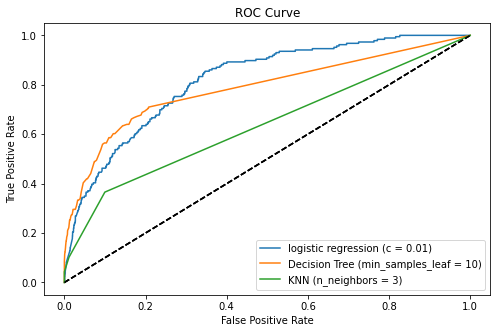

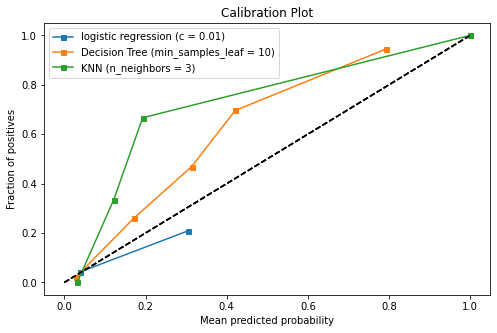

In [28]:
predictors = base_pred
print("Running model on features: ", predictors)
res = sweepModels(x_train[predictors], x_train[target], x_test[predictors], 
                  x_test[target], "base_pred")
res_df = res_df.append(res)

Running model on features:  ['period', 'vote_mean', 'vote_count', 'commentId_count', 'likes_sum', 'likes_mean', 'dislikes_sum', 'dislikes_mean', 'commentLen_mean', 'likeability', 'happiness_level_change', 'likes_cumsum', 'dislikes_cumsum', 'vote_cumsum', 'comment_cumsum']
Best C for logistic regression model is 0.01, with an f1 score of 0.0
--- Logistic model coefs ---
                               0
period                 -0.012102
vote_mean              -0.037114
vote_count             -0.213525
commentId_count        -0.026075
likes_sum               0.000020
likes_mean             -0.009666
dislikes_sum            0.014807
dislikes_mean          -0.017820
commentLen_mean        -0.000778
likeability            -0.167287
happiness_level_change -0.314114
likes_cumsum           -0.000240
dislikes_cumsum         0.002995
vote_cumsum             0.003003
comment_cumsum         -0.004369
Test accuracy for logistic regression (c = 0.01) is 0.9557669441141499.
AUC for logistic regression 

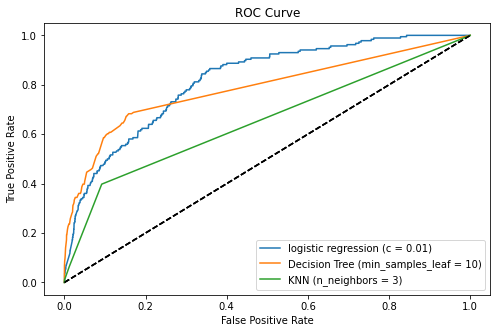

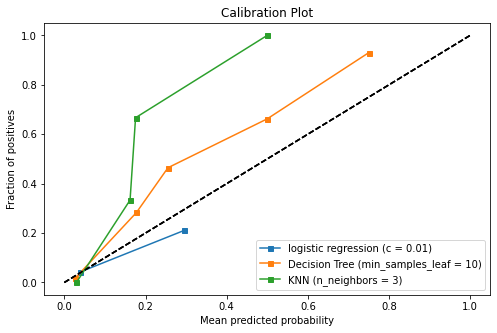

In [29]:
predictors += cumsum_pred
print("Running model on features: ", predictors)
res = sweepModels(x_train[predictors], x_train[target], x_test[predictors], 
                  x_test[target], "base + cumsum")
res_df = res_df.append(res)

Running model on features:  ['period', 'vote_mean', 'vote_count', 'commentId_count', 'likes_sum', 'likes_mean', 'dislikes_sum', 'dislikes_mean', 'commentLen_mean', 'likeability', 'happiness_level_change', 'likes_cumsum', 'dislikes_cumsum', 'vote_cumsum', 'comment_cumsum', 'likes_freq', 'dislikes_freq', 'vote_freq', 'comment_freq']
Best C for logistic regression model is 0.01, with an f1 score of 0.002547770700636943
--- Logistic model coefs ---
                               0
period                 -0.044326
vote_mean              -0.066719
vote_count             -0.174380
commentId_count        -0.014098
likes_sum               0.003129
likes_mean             -0.010329
dislikes_sum            0.009195
dislikes_mean          -0.016642
commentLen_mean        -0.000718
likeability            -0.173201
happiness_level_change -0.255888
likes_cumsum            0.000247
dislikes_cumsum         0.001248
vote_cumsum             0.007830
comment_cumsum         -0.001592
likes_freq             

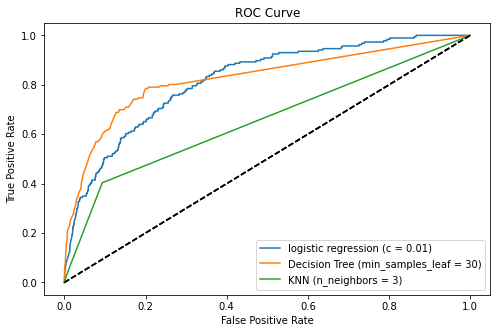

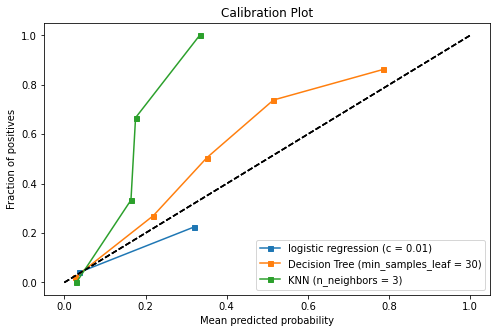

In [30]:
predictors += freq_pred
print("Running model on features: ", predictors)
res = sweepModels(x_train[predictors], x_train[target], x_test[predictors], 
                  x_test[target], "base + cumsum + freq")
res_df = res_df.append(res)

Running model on features:  ['period', 'vote_mean', 'vote_count', 'commentId_count', 'likes_sum', 'likes_mean', 'dislikes_sum', 'dislikes_mean', 'commentLen_mean', 'likeability', 'happiness_level_change', 'likes_cumsum', 'dislikes_cumsum', 'vote_cumsum', 'comment_cumsum', 'likes_freq', 'dislikes_freq', 'vote_freq', 'comment_freq', 'vote_mean_norm']
Best C for logistic regression model is 0.01, with an f1 score of 0.002547770700636943
--- Logistic model coefs ---
                               0
period                 -0.044390
vote_mean              -0.076925
vote_count             -0.174030
commentId_count        -0.015699
likes_sum               0.003271
likes_mean             -0.010891
dislikes_sum            0.009115
dislikes_mean          -0.016465
commentLen_mean        -0.000715
likeability            -0.168981
happiness_level_change -0.257016
likes_cumsum            0.000249
dislikes_cumsum         0.001249
vote_cumsum             0.007855
comment_cumsum         -0.001649
likes

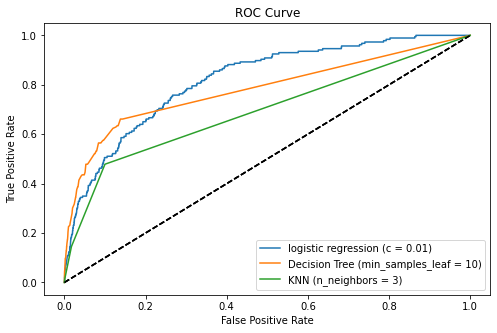

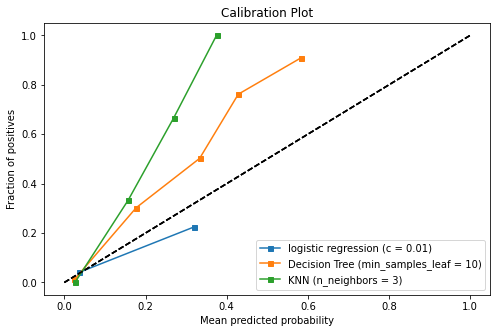

In [31]:
predictors += company_pred
print("Running model on features: ", predictors)
res = sweepModels(x_train[predictors], x_train[target], x_test[predictors], 
                  x_test[target], "base + cumsum + freq + company")
res_df = res_df.append(res)

In [32]:
res_df

,Feature,Model,F1,Accuracy,AUC
0,b a s e _ p r e d,logistic regression (c = 0.01),0.000000,0.955767,0.818289
1,b a s e _ p r e d,Decision Tree (min_samples_leaf = 10),0.276637,0.958383,0.784871
2,b a s e _ p r e d,KNN (n_neighbors = 3),0.125737,0.949346,0.636158
0,b a s e + c u m s u m,logistic regression (c = 0.01),0.000000,0.955767,0.817593
1,b a s e + c u m s u m,Decision Tree (min_samples_leaf = 10),0.280451,0.958383,0.785134
2,b a s e + c u m s u m,KNN (n_neighbors = 3),0.124630,0.946968,0.653487
0,b a s e + c u m s u m + f r e q,logistic regression (c = 0.01),0.002548,0.955767,0.818152
1,b a s e + c u m s u m + f r e q,Decision Tree (min_samples_leaf = 30),0.277531,0.957669,0.824711
2,b a s e + c u m s u m + f r e q,KNN (n_neighbors = 3),0.134060,0.946730,0.655279
0,b a s e + c u m s u m + f r e q + ...,logistic regression (c = 0.01),0.002548,0.955767,0.818244
